In [1]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
df = pd.read_csv('etc.csv',parse_dates=True, index_col=('date'))
df.dropna(inplace=True)
df.rename(columns={'date':'Date','PriceUSD':'Close'}, inplace=True)

futures = df.tail()
df=df.shift(5).dropna()
df.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
date,,,,,,,,,,,,,,,,,,,,,
2019-11-07,480938.0,6623.0,10109872.0,1526.479239,5.665300e+08,1.288827e+14,0.000175,0.000864,0.000021,0.000103,...,2.631568e+06,18.944308,93.351351,0.998957,4.922534,634615.357591,3.127177e+06,0.048310,0.037269,0.040114
2019-11-08,487123.0,6626.0,10060597.0,1518.351494,5.617707e+08,1.259930e+14,0.000162,0.000791,0.000021,0.000103,...,2.106494e+06,15.509706,75.767189,0.998896,4.879751,522335.877177,2.551687e+06,0.048313,0.037288,0.040113
2019-11-09,456285.0,6492.0,10046189.0,1547.472120,5.704847e+08,1.248758e+14,0.000184,0.000911,0.000021,0.000104,...,2.525277e+06,19.041518,94.442132,0.999549,4.957563,656456.321550,3.255892e+06,0.048322,0.037364,0.039646
2019-11-10,450544.0,6560.0,10060327.0,1533.586433,5.777602e+08,1.233990e+14,0.000179,0.000898,0.000021,0.000105,...,3.358295e+06,23.973655,120.393431,0.999342,5.018602,835122.288744,4.193905e+06,0.048304,0.036883,0.039343
2019-11-11,461538.0,6581.0,10061580.0,1528.883148,5.842786e+08,1.254541e+14,0.000172,0.000876,0.000021,0.000107,...,3.798589e+06,26.576808,134.941052,0.999569,5.075210,920035.951981,4.671389e+06,0.048303,0.036105,0.039394


In [3]:
X=df.copy()

# X.drop('Close', axis=1, inplace=True)
X.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
date,,,,,,,,,,,,,,,,,,,,,
2019-11-07,480938.0,6623.0,10109872.0,1526.479239,5.665300e+08,1.288827e+14,0.000175,0.000864,0.000021,0.000103,...,2.631568e+06,18.944308,93.351351,0.998957,4.922534,634615.357591,3.127177e+06,0.048310,0.037269,0.040114
2019-11-08,487123.0,6626.0,10060597.0,1518.351494,5.617707e+08,1.259930e+14,0.000162,0.000791,0.000021,0.000103,...,2.106494e+06,15.509706,75.767189,0.998896,4.879751,522335.877177,2.551687e+06,0.048313,0.037288,0.040113
2019-11-09,456285.0,6492.0,10046189.0,1547.472120,5.704847e+08,1.248758e+14,0.000184,0.000911,0.000021,0.000104,...,2.525277e+06,19.041518,94.442132,0.999549,4.957563,656456.321550,3.255892e+06,0.048322,0.037364,0.039646
2019-11-10,450544.0,6560.0,10060327.0,1533.586433,5.777602e+08,1.233990e+14,0.000179,0.000898,0.000021,0.000105,...,3.358295e+06,23.973655,120.393431,0.999342,5.018602,835122.288744,4.193905e+06,0.048304,0.036883,0.039343
2019-11-11,461538.0,6581.0,10061580.0,1528.883148,5.842786e+08,1.254541e+14,0.000172,0.000876,0.000021,0.000107,...,3.798589e+06,26.576808,134.941052,0.999569,5.075210,920035.951981,4.671389e+06,0.048303,0.036105,0.039394


In [4]:
X.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
date,,,,,,,,,,,,,,,,,,,,,
2017-07-30,14928.0,6116.0,7168630.0,1172.110857,1.372317e+09,9.501990e+13,0.000565,0.008245,0.00042,0.006124,...,2.899045e+07,73.908062,1077.725576,1.010053,14.728569,2.732824e+06,3.984998e+07,0.082576,0.079857,0.079565
2017-07-31,14582.0,6060.0,7066567.0,1166.100165,1.378569e+09,9.634340e+13,0.000567,0.008303,0.00042,0.006150,...,2.311280e+07,56.791685,831.627892,1.006410,14.737342,2.046829e+06,2.997270e+07,0.082494,0.079560,0.079545
2017-08-01,14530.0,6009.0,6931031.0,1153.441671,1.364476e+09,9.548011e+13,0.000557,0.008070,0.00042,0.006085,...,9.635061e+06,30.492095,441.798472,1.005109,14.562976,1.064479e+06,1.542318e+07,0.082513,0.079273,0.078816
2017-08-02,14426.0,6073.0,7122478.0,1172.810473,1.311199e+09,9.636102e+13,0.000570,0.007935,0.00042,0.005846,...,1.535792e+07,47.928217,667.089446,1.006916,14.014768,1.746600e+06,2.431007e+07,0.082587,0.079075,0.078957
2017-08-03,14782.0,6037.0,7637527.0,1265.119596,1.345891e+09,9.902156e+13,0.000766,0.010937,0.00042,0.005998,...,2.218729e+07,56.154749,802.003184,1.006722,14.378021,2.023649e+06,2.890179e+07,0.082566,0.079014,0.078808


In [5]:
y = df["Close"].values.reshape(-1, 1)


In [6]:
y

array([[14.58197586],
       [14.64347978],
       [14.4889509 ],
       [13.91851153],
       [14.28201887],
       [13.77123374],
       [13.7885407 ],
       [14.56510615],
       [14.46664599],
       [15.2493882 ],
       [14.84054226],
       [15.51405269],
       [15.45937461],
       [15.22300185],
       [16.01143484],
       [15.35175339],
       [15.34877983],
       [15.20067716],
       [14.69817081],
       [14.15537854],
       [14.03801553],
       [13.45912642],
       [13.99524691],
       [13.82223514],
       [13.43158027],
       [13.52161383],
       [13.84497647],
       [14.78255225],
       [14.37384816],
       [15.3700777 ],
       [15.1353706 ],
       [15.17709794],
       [15.28437984],
       [16.06862047],
       [15.80123182],
       [15.85035956],
       [15.96149367],
       [16.85094247],
       [22.40064062],
       [19.88457548],
       [19.46658765],
       [17.20102432],
       [17.4310945 ],
       [19.32009952],
       [18.56824472],
       [16

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [8]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Choose learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=learning_rate,
        max_features=2,
        max_depth=3,
        random_state=0)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.996
Accuracy score (validation): 0.989

Learning rate:  0.1
Accuracy score (training): 0.998
Accuracy score (validation): 0.992

Learning rate:  0.25
Accuracy score (training): 0.999
Accuracy score (validation): 0.992

Learning rate:  0.5
Accuracy score (training): 0.999
Accuracy score (validation): 0.982

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.957

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.924



In [10]:
# Create GradientBoostingClassifier model
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=.25,
    max_features=5,
    max_depth=3,
    random_state=0)

# Fit the model
model.fit(X_train_scaled,y_train.ravel())

# Score the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled,
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled,
        y_test)))

Accuracy score (training): 1.000
Accuracy score (validation): 0.997


In [11]:
# Make predictions
predictions = model.predict(X_test_scaled)
y_test = y_test.ravel()
actual = pd.Series(y_test)


In [12]:
pd.DataFrame(predictions, actual).head()

,0
6.321456,6.449149
5.281884,6.780881
16.241774,16.921937
6.094785,5.982179
34.196655,34.061099


In [13]:
X.tail(1)

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
date,,,,,,,,,,,,,,,,,,,,,
2019-11-11,461538.0,6581.0,10061580.0,1528.883148,5.842786e+08,1.254541e+14,0.000172,0.000876,0.000021,0.000107,...,3.798589e+06,26.576808,134.941052,0.999569,5.07521,920035.951981,4.671389e+06,0.048303,0.036105,0.039394


In [14]:
X_future = X_scaler.transform(X.tail(5))
predictions = model.predict(X_future)
predictions

array([4.92386257, 4.88795146, 4.96043617, 5.01866674, 5.08144514])

In [15]:
actual=futures['Close'].tail(5).ravel()
dates=df.reset_index()
dates=dates['date'].tail(5).ravel()
actual

array([5.22555709, 4.98497359, 4.95696524, 5.03885961, 4.88417135])

In [16]:
dates

array(['2019-11-07T00:00:00.000000000', '2019-11-08T00:00:00.000000000',
       '2019-11-09T00:00:00.000000000', '2019-11-10T00:00:00.000000000',
       '2019-11-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
pd.DataFrame({'Predicted':predictions,'Actual':actual, 'Date':dates,'Accuracy':(predictions/actual)})

,Predicted,Actual,Date,Accuracy
0,4.923863,5.225557,2019-11-07,0.942266
1,4.887951,4.984974,2019-11-08,0.980537
2,4.960436,4.956965,2019-11-09,1.000700
3,5.018667,5.038860,2019-11-10,0.995993
4,5.081445,4.884171,2019-11-11,1.040390


In [18]:
real_future = X_scaler.transform(df.tail(1))
predictions = model.predict(real_future)

In [19]:
predictions

array([5.08144514])

Based on my predictions today, (Nov 7th)- I should sell my stock tomorrow (Nov 8th)


In [20]:

datelist = pd.date_range(pd.datetime.today(), periods=1).tolist()
future_dates=[]
for date in datelist:
    future_dates.append(date.strftime("%m-%d-%Y"))

In [21]:
pd.DataFrame({'Date':future_dates,'Predictions':predictions})

,Date,Predictions
0,11-12-2019,5.081445


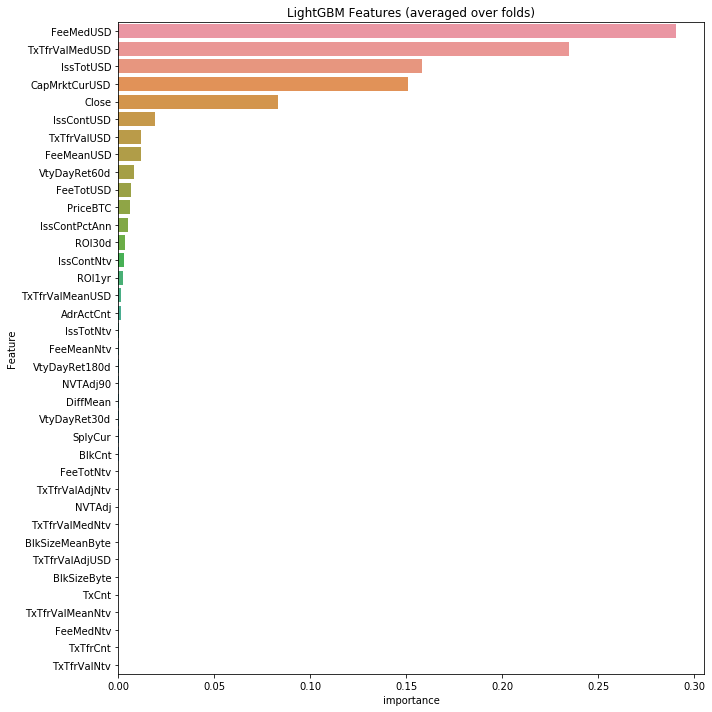

In [22]:
fold_importance_df=pd.DataFrame()
fold_importance_df['Feature']=df.tail(5).columns
feature_importance_df=pd.DataFrame()
fold_importance_df["importance"]=model.feature_importances_[:len(df.tail(5).columns)]
feature_importance_df=pd.concat([feature_importance_df, fold_importance_df], axis=0)
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:200].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()

plt.savefig('lgbm_importances.png')